---
# PfDA Project 2
---

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
import json
import csv
# Other libraries if needed
# import statsmodels
# import datetime
# import requests


---
# **Introduction**
---

This project aims to delve into a comprehensive examination of climate data across an extensive timeline, ranging from 800,000 years ago to the present day. The analysis primarily focuses on establishing correlations between CO2 levels and temperature anomalies while also exploring changes in polar ice coverage as a key variable. This research also seeks to investigate climate change signals within the context of Ireland's meteorological observations and harnesses data fusion techniques to amalgamate multiple datasets into a structured pandas dataframe.

## Project Overview
This project involves an intricate series of steps, encompassing data collection from reputable sources, integration of diverse datasets into a coherent framework, exploratory data analysis to uncover trends and relationships, and predictive modeling techniques to forecast future global temperature anomalies. Additionally, the study entails the comparison of these predictions with established climate models, intending to shed light on potential accelerated warming trends observed in recent climate features.

## Objectives and Goals
The primary objective of this research is to perform an in-depth analysis of climate data, investigating the relationship between CO2 levels and temperature anomalies while exploring related variables. The specific goals include the examination of Irish climate change signals, prediction of future global temperature anomalies, and the comparison of these predictions with established climate models.

## Scope and Limitations
The scope of this study encompasses the analysis of climate data spanning an extensive timeframe, incorporating various datasets to establish correlations and predict future temperature anomalies. However, certain limitations exist, including the potential constraints in data availability or accuracy, complexities in predictive modeling, and the inherent uncertainties associated with long-term climate predictions.

---
# Extraction
---

## Temperature

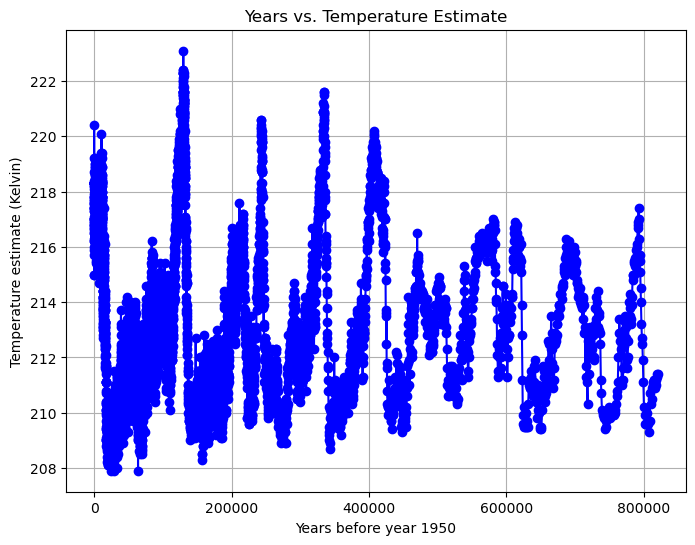

In [2]:
file_path1 = './data/temp/epicaDC.deuttemp.EDC3-AICC.csv'
df1 = pd.read_csv(file_path1)

# Extracting columns 3 (EDC3 age scale) and 5 (Temperature estimate)
edc3_age = df1['EDC3béta']
temperature_estimate = df1['temp']

# Plotting the data
plt.figure(figsize=(8, 6))
plt.plot(edc3_age, temperature_estimate, marker='o', linestyle='-', color='blue')
plt.xlabel('Years before year 1950')
plt.ylabel('Temperature estimate (Kelvin)')
plt.title('Years vs. Temperature Estimate')
plt.grid(True)
plt.show()

## CO2

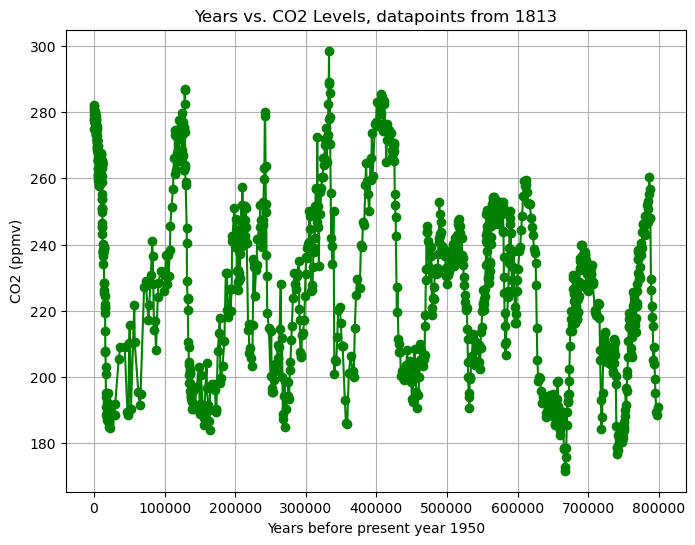

In [3]:
file_path2 = './data/co2/41586_2008_BFnature06949_MOESM31_ESM.xlsx'
df2 = pd.read_excel(file_path2, skiprows=6, sheet_name='3.  Composite CO2')

# Handling NaN values (if any)
df2.dropna(subset=['EDC3_gas_a (yr)', 'CO2 (ppmv)'], inplace=True)

# Extract data from the first two columns
years = df2['EDC3_gas_a (yr)']
co2 = df2['CO2 (ppmv)']

# Plotting the extracted data with the same formatting
plt.figure(figsize=(8, 6))
plt.plot(years, co2, marker='o', linestyle='-', color='green')
plt.xlabel('Years before present year 1950')
plt.ylabel('CO2 (ppmv)')
plt.title('Years vs. CO2 Levels, datapoints from 1813')
plt.grid(True)
plt.show()

The above data has the first data point in years as being 137 years Before Present(BP), with BP being 1950. In the below data, the year values in the first column commence at -51 years BP, which would put the year as 2001.

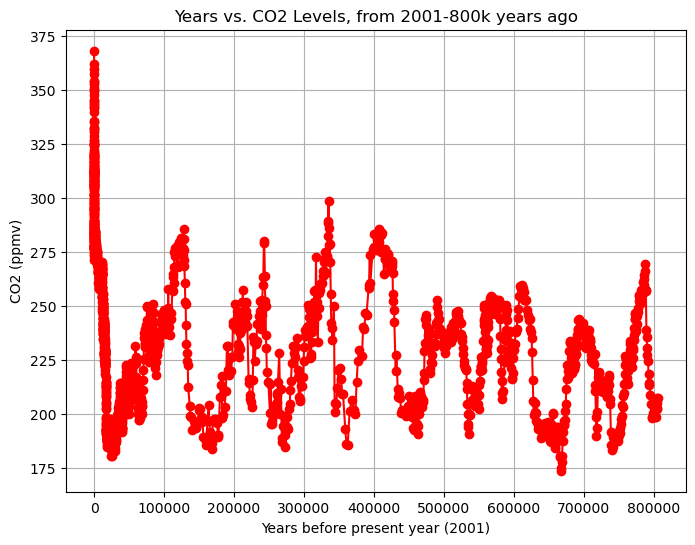

In [4]:
file_path3 = './data/co2/grl52461-sup-0003-supplementary.xlsx'
df3 = pd.read_excel(file_path3, skiprows=14, sheet_name='CO2 Composite')

# Handling NaN values (if any)
df3.dropna(subset=['Gasage (yr BP) ', 'CO2 (ppmv)'], inplace=True)

# Extract data from the first two columns
Gasage = df3['Gasage (yr BP) ']
co22 = df3['CO2 (ppmv)']

# Plotting the extracted data with the same formatting
plt.figure(figsize=(8, 6))
plt.plot(Gasage, co22, marker='o', linestyle='-', color='red')
plt.xlabel('Years before present year (2001)')
plt.ylabel('CO2 (ppmv)')
plt.title('Years vs. CO2 Levels, from 2001-800k years ago')
plt.grid(True)
plt.show()

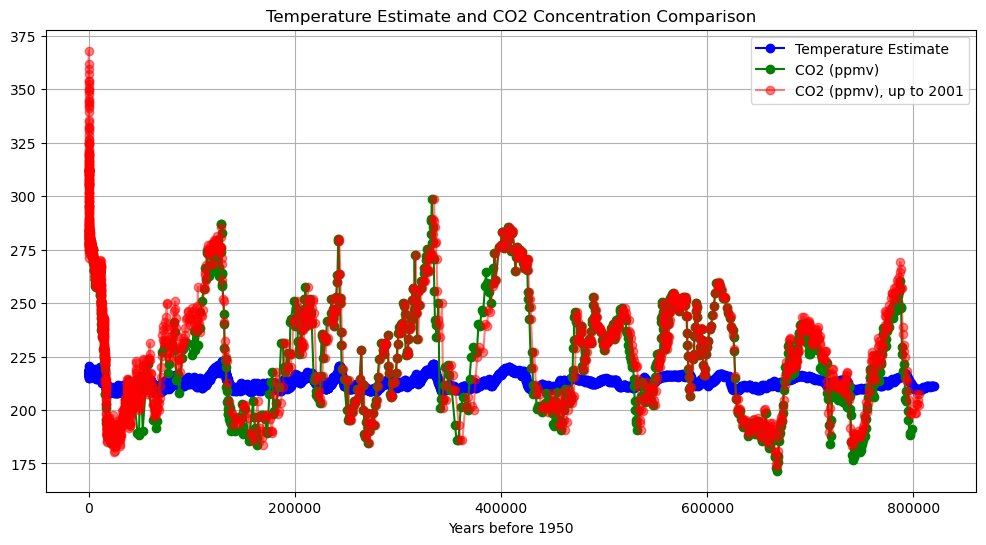

In [5]:
# Plotting both sets of data on the same graph
plt.figure(figsize=(12, 6))

# Plotting the first dataset
plt.plot(edc3_age, temperature_estimate, marker='o', linestyle='-', color='blue', label='Temperature Estimate')

# Plotting the second dataset
plt.plot(years, co2, marker='o', linestyle='-', color='green', label='CO2 (ppmv)')

# Plotting the third dataset
plt.plot(Gasage, co22, marker='o', linestyle='-', color='red', label='CO2 (ppmv), up to 2001', alpha=0.5)

plt.xlabel('Years before 1950')
plt.grid(True)
plt.legend()
plt.title('Temperature Estimate and CO2 Concentration Comparison')
plt.show()

## Ice

The simulated ice data was gathered from the [NOAA](https://www.ncei.noaa.gov/access/paleo-search/) website.
A search entered as below will yield the original data set.
> Global 5 Million Year Sea Level, Temperature, and d18Osw Reconstructions
https://www.ncei.noaa.gov/pub/data/paleo/reconstructions/deboer2014/deboer2014.txt

In [6]:
# Read the text file with tab-separated values and replace -999 with NaN
file_path_txt = './data/ice/deboer2014.txt'
df = pd.read_csv(file_path_txt, delimiter='\t', na_values=-999, skiprows=114)

# Save the DataFrame to a CSV file
file_path_csv = './data/ice/generated/deboer_icedata.csv'
df.to_csv(file_path_csv, index=False)

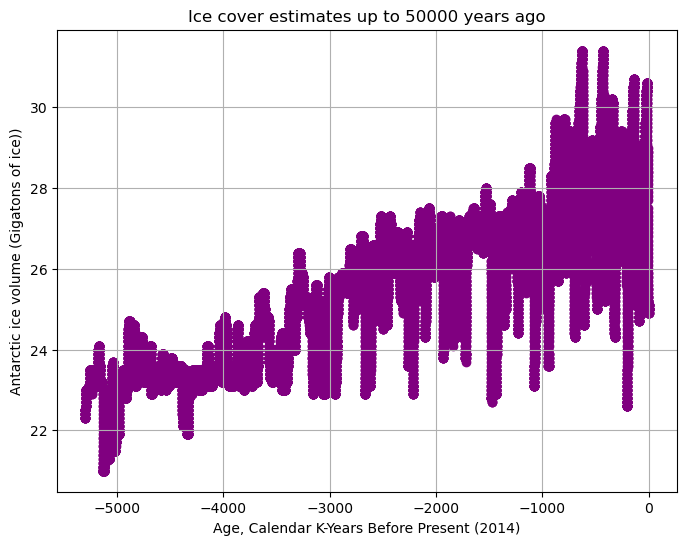

In [7]:
# Read the CSV file into a Pandas DataFrame
df_ice = pd.read_csv('./data/ice/generated/deboer_icedata.csv')

# Extract data from the first column and 'AnIS-V' column
year = df_ice['age_calkaBP']
ice_volume = df_ice['AnIS-V']
temp_anom = df_ice['tempanomNH']
# Plotting the extracted data
plt.figure(figsize=(8, 6))
plt.scatter(year, ice_volume, color='purple')
plt.xlabel('Age, Calendar K-Years Before Present (2014)')  
plt.ylabel('Antarctic ice volume (Gigatons of ice))')  
plt.title('Ice cover estimates up to 50000 years ago')
plt.grid(True)
plt.show()


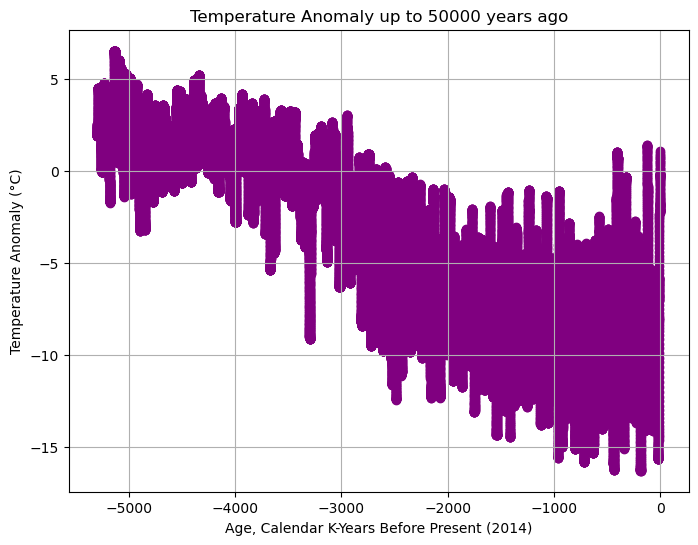

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(year, temp_anom, color='purple')
plt.xlabel('Age, Calendar K-Years Before Present (2014)')  
plt.ylabel('Temperature Anomaly (°C)')  
plt.title('Temperature Anomaly up to 50000 years ago')
plt.grid(True)
plt.show()

## Ireland

Irish rainfall data from 1711 - 2016 gathered from MET [Éireann](https://www.met.ie/climate/available-data/long-term-data-sets/#MonthlyIIP), understanding gathered from this journal [article](https://cp.copernicus.org/articles/14/413/2018/) from Maynooth University.

This data shows the median monthly rainfall data for each month from the year 1711 - 2016. The data is a composite of many different data points taken from different weather stations throughout the given time period.

In [9]:
rain = pd.read_csv('./data/ireland/IOI_1711_SERIES.CSV')

print(rain.head())

   Year  Month  Median montly series
0  1711      1                  16.4
1  1711      2                  73.1
2  1711      3                 121.2
3  1711      4                  85.2
4  1711      5                  66.6


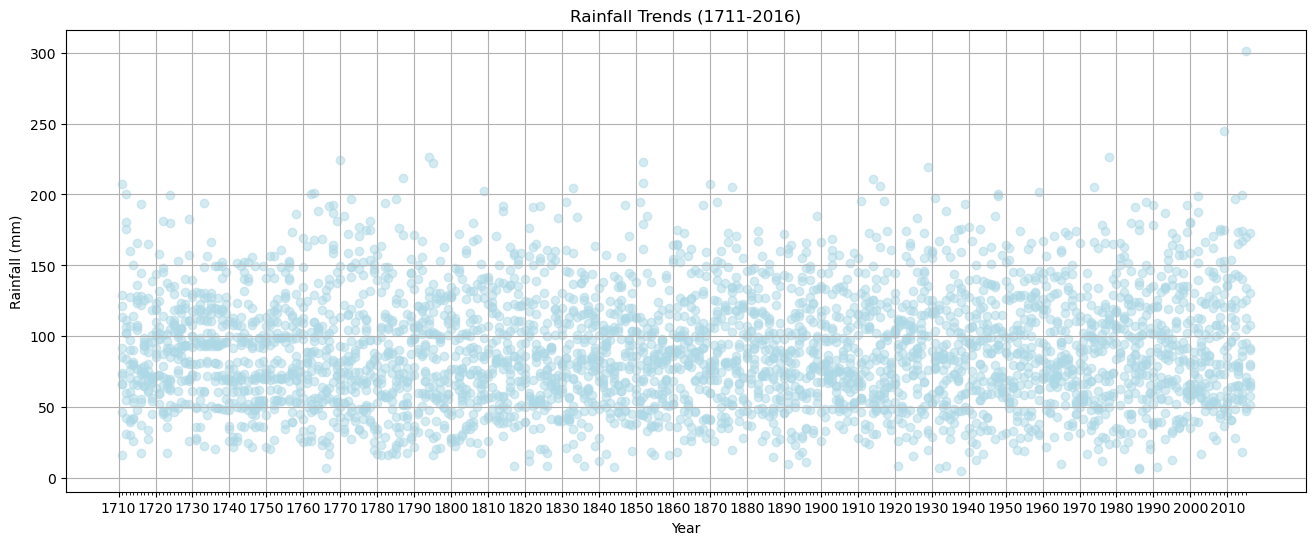

In [10]:
# Create a figure and axis
plt.figure(figsize=(16, 6))
ax = plt.gca()

# Plotting the data as individual points
plt.scatter(rain['Year'], rain['Median montly series'], color='lightblue', alpha=0.5)

# Set x-axis major ticks every 10 years
major_ticks = range(1710, 2017, 10)
ax.set_xticks(major_ticks)

# Set minor ticks between major ticks
minor_ticks = range(1711, 2016, 1)
ax.set_xticks(minor_ticks, minor=True)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Trends (1711-2016)')

# Show grid and plot
plt.grid(True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

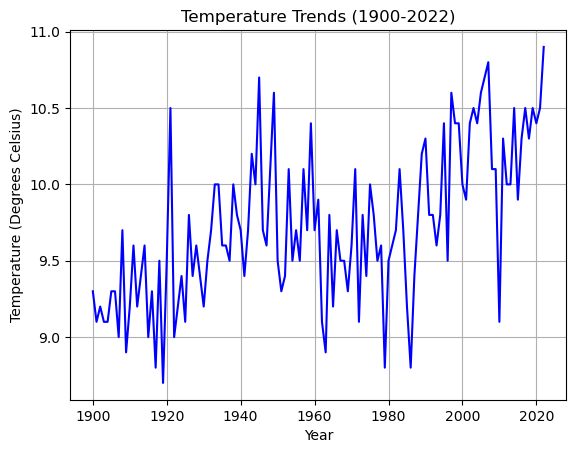

In [11]:
iretemp = pd.read_csv('./data/ireland/LongTermTemperatures_1900-2022_annual.csv')

plt.plot(iretemp['year'], iretemp['Annual'], color='blue')
plt.xlabel('Year')
plt.ylabel('Temperature (Degrees Celsius)')
plt.title('Temperature Trends (1900-2022)')

plt.grid(True)
plt.show

# Transformations

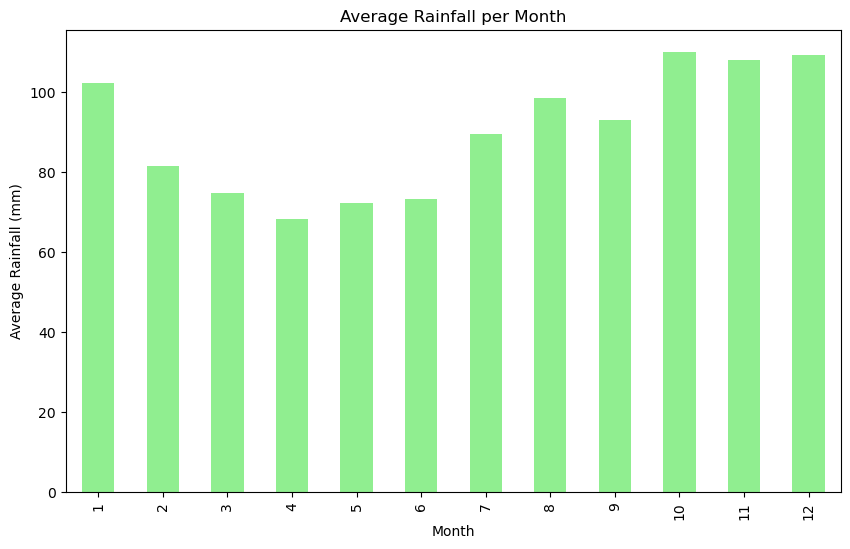

In [12]:
# Aggregating rainfall for each month
monthly_rainfall = rain.groupby('Month')['Median montly series'].mean()

# Plotting a bar plot for monthly rainfall
plt.figure(figsize=(10, 6))
monthly_rainfall.plot(kind='bar', color='lightgreen')
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.title('Average Rainfall per Month')
plt.show()

In [13]:
# # Calculate yearly median rainfall values
yearly_rainfall = rain.groupby('Year')['Median montly series'].median().reset_index()

# Display the first and last rows of the yearly rainfall data
#print(yearly_rainfall.head())

#print(yearly_rainfall.tail())

### Aggregating timeseries data to examine the rainfall data

By aggregating the data, it becomes possible to observe the broader trend of rainfall over the span of the entire dataset.

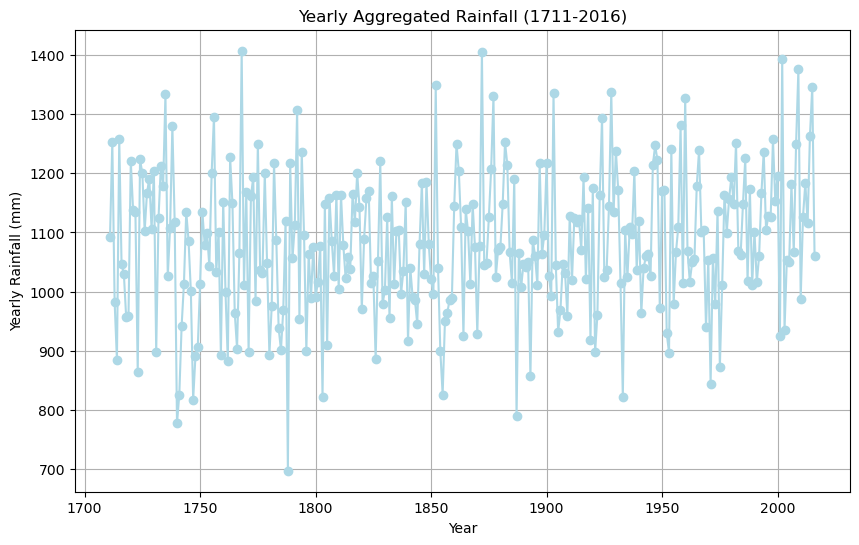

In [14]:
# Convert 'Year' and 'Month' columns to datetime
rain['Date'] = pd.to_datetime(rain[['Year', 'Month']].assign(day=1))

# Group by year and sum the rainfall for each year
yearly_rainfall = rain.groupby(rain['Date'].dt.year)['Median montly series'].sum()

# Plot the aggregated yearly rainfall data
plt.figure(figsize=(10, 6))
plt.plot(yearly_rainfall.index, yearly_rainfall.values, marker='o', linestyle='-', color='lightblue')
plt.xlabel('Year')
plt.ylabel('Yearly Rainfall (mm)')
plt.title('Yearly Aggregated Rainfall (1711-2016)')
plt.grid(True)
plt.show()

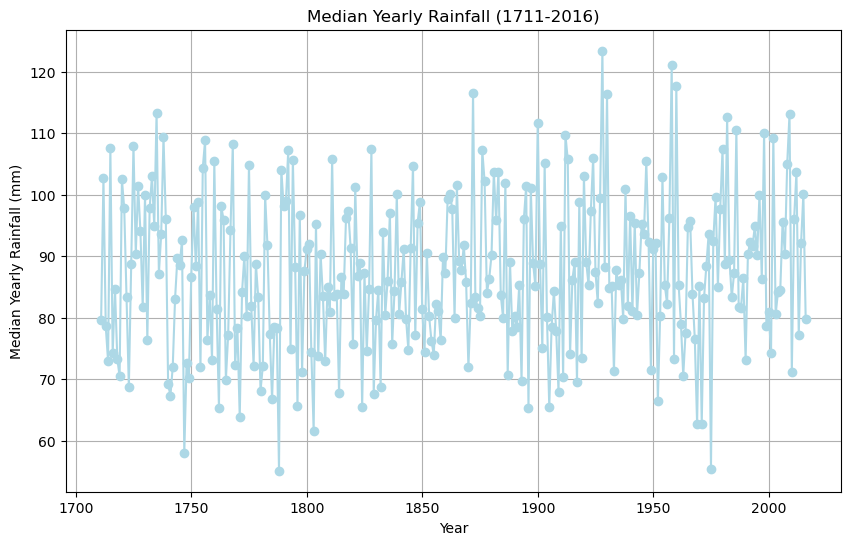

In [15]:
# Convert 'Year' and 'Month' columns to datetime
rain['Date'] = pd.to_datetime(rain[['Year', 'Month']].assign(day=1))

# Calculate median yearly rainfall
yearly_median_rainfall = rain.groupby(rain['Date'].dt.year)['Median montly series'].median()

# Plot the median yearly rainfall data
plt.figure(figsize=(10, 6))
plt.plot(yearly_median_rainfall.index, yearly_median_rainfall.values, marker='o', linestyle='-', color='lightblue')
plt.xlabel('Year')
plt.ylabel('Median Yearly Rainfall (mm)')
plt.title('Median Yearly Rainfall (1711-2016)')
plt.grid(True)
plt.show()


Creating a yearly rainfall dataset

In [16]:
yearly_rainfall_dataset = yearly_rainfall.reset_index()
yearly_rainfall_dataset.columns = ['Year', 'Rainfall']

# write to a new csv file
yearly_rainfall_dataset.to_csv('./data/ireland/generated/yearly_totalrainfall.csv', index=False)

In [17]:
yearly_median_rainfall_dataset = yearly_median_rainfall.reset_index()
yearly_median_rainfall_dataset.columns = ['Year', 'Median rainfall']

# write to a new csv file
yearly_median_rainfall_dataset.to_csv('./data/ireland/generated/yearly_medianrainfall.csv', index=False)

## Reducing for Irish Data

Before aligning the datasets, they must be transformed to be represented on the same time scale.
To do this, we will need to change the ice/co2 and temp data to only include values between 1711-2016, but on their timescale

For the CO2 data, the latest year is 2001, which reads as -51 from the data format in the file. To compare it with the Irish data, it needs to be reduced down to the same range.

In [18]:
new_co2 = df3.copy()
# calculate the actual calendar year based on the difference from the reference year
reference_year = 1950

# Transform the 'Gasage (yr BP)' column to actual calendar years
new_co2['Year'] = reference_year - new_co2['Gasage (yr BP) ']

#print(new_co2)

In [19]:
# Get data from -51 years before present up to the final desired value
end_value = 1711  # Value to end on

# Filter the DataFrame based on the condition where 'Actual Year' reaches or exceeds the specified value
filtered_co2 = new_co2[new_co2['Year'] >= end_value]
#print(filtered_co2)

In [20]:
new_temp = df1.copy()
# calculate the actual calendar year based on the difference from the reference year
reference_year = 1950

# Transform the reference column to actual calendar years
new_temp['Year'] = reference_year - new_temp['EDC3béta']

#print(new_temp.head())

In [21]:
end_value = 1711.00  # Value to end on
filtered_temp = new_temp[new_temp['Year'] >= end_value]

#print(filtered_temp)
filtered_temp.to_csv('./data/temp/generated/filtered_temp.csv', index=False)

## Reducing for Ice Data

Below there is transformations applied to Ice, CO2 and Temperature so they can be compared on the same time scale.
The limit on the most recent time is the year 2000 from the temperature dataset. The furthest back limit is the year 52986, taken from the Ice Data

In [22]:
filtered_ice = df_ice.copy()

# Set the reference year to 1950 by adjusting the value representing the present (2014) to 1950
filtered_ice['Transformed Year'] = 1950 - ((filtered_ice['age_calkaBP'] * 100) + 2014)

#print(filtered_ice.tail())
filtered_ice = filtered_ice[['age_calkaBP', 'AnIS-V', 'tempanomNH', 'Transformed Year']]
# Save the transformed ice data to a CSV file
filtered_ice.to_csv('./data/ice/generated/filtered_ice.csv', index=False)


In [23]:
temp_for_ice = df1.copy()

end_year = 530000
# Filter the DataFrame based on the condition where 'EDC3béta' reaches or exceeds the specified value
temp_for_ice = temp_for_ice[temp_for_ice['EDC3béta'] <= end_year]
temp_for_ice = temp_for_ice[['EDC3béta', 'temp']]

#print(temp_for_ice)

In [24]:
co2_for_ice = df3.copy()

co2_for_ice = co2_for_ice[co2_for_ice['Gasage (yr BP) '] <= end_year]
co2_for_ice = co2_for_ice[['Gasage (yr BP) ', 'CO2 (ppmv)']]
#print(co2_for_ice)

## Visualising the filtered data for irish Data

After the above transformations, we can visualise the relationships between them.

<function matplotlib.pyplot.show(close=None, block=None)>

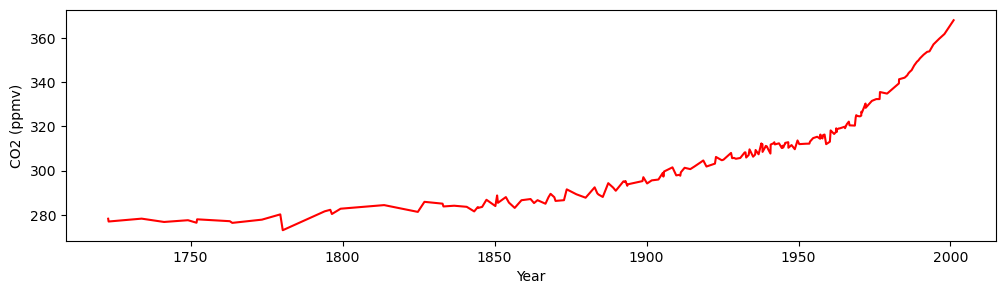

In [25]:
# Plotting CO2 data against year
plt.figure(figsize=(12,3))
plt.plot(filtered_co2['Year'], filtered_co2['CO2 (ppmv)'], color='red', label='CO2 (ppmv)')
plt.xlabel('Year')
plt.ylabel('CO2 (ppmv)')
plt.show

Text(0, 0.5, 'Temperature (Kelvin)')

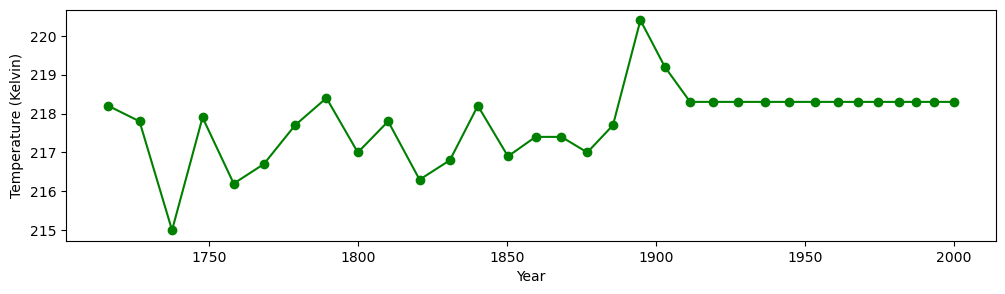

In [26]:
# Plotting temperature data against year
plt.figure(figsize=(12,3))
plt.plot(filtered_temp['Year'], filtered_temp['temp'], marker='o', color='green', label='Temperature Estimate')
plt.xlabel('Year')
plt.ylabel('Temperature (Kelvin)')

<function matplotlib.pyplot.show(close=None, block=None)>

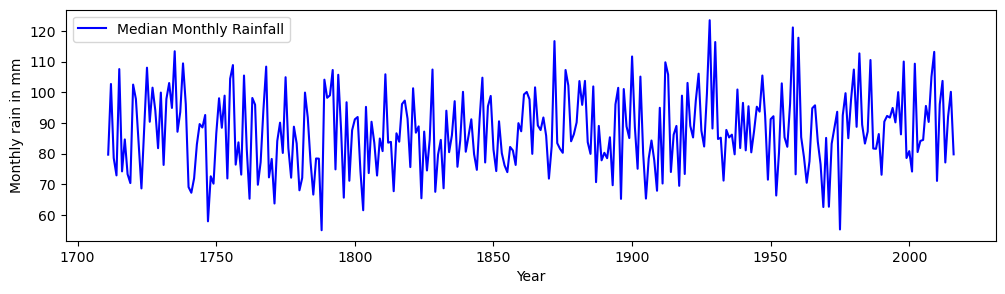

In [27]:
# Plotting yearly median rainfall against year
plt.figure(figsize=(12,3))
plt.plot(yearly_median_rainfall_dataset['Year'], yearly_median_rainfall_dataset['Median rainfall'], color='blue', label='Median Monthly Rainfall')
plt.xlabel('Year')
plt.ylabel('Monthly rain in mm')
plt.legend()
plt.show

Text(0, 0.5, 'Total rain in mm')

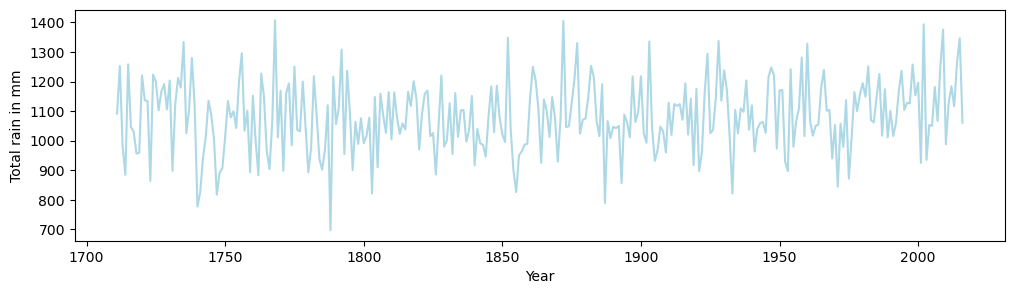

In [28]:
# Plotting yearly total rainfall
plt.figure(figsize=(12,3))
plt.plot(yearly_rainfall_dataset['Year'], yearly_rainfall_dataset['Rainfall'], color='lightblue', label='Total rainfall')
plt.xlabel('Year')
plt.ylabel('Total rain in mm')

## Ice Visualisation

And also visualise the relationships between ice, co2 and temp data in specific ranges.

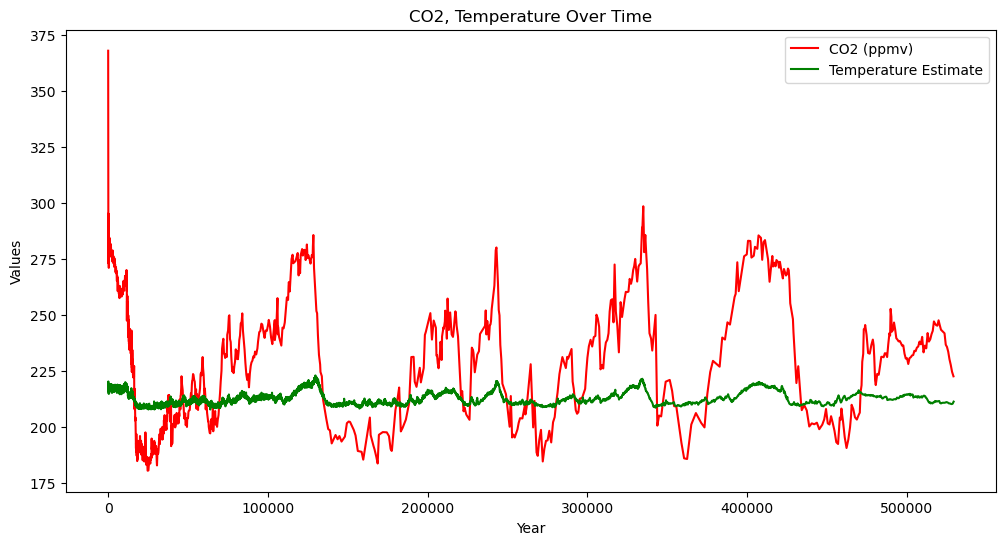

In [29]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting CO2 data against year
plt.plot(co2_for_ice['Gasage (yr BP) '], co2_for_ice['CO2 (ppmv)'], color='red', label='CO2 (ppmv)')

# Plotting temperature data against year
plt.plot(temp_for_ice['EDC3béta'], temp_for_ice['temp'], color='green', label='Temperature Estimate')

ax.set_xlabel('Year')
ax.set_ylabel('Values')
ax.set_title('CO2, Temperature Over Time')

ax.legend()
plt.show()

Text(0, 0.5, 'Ice volume')

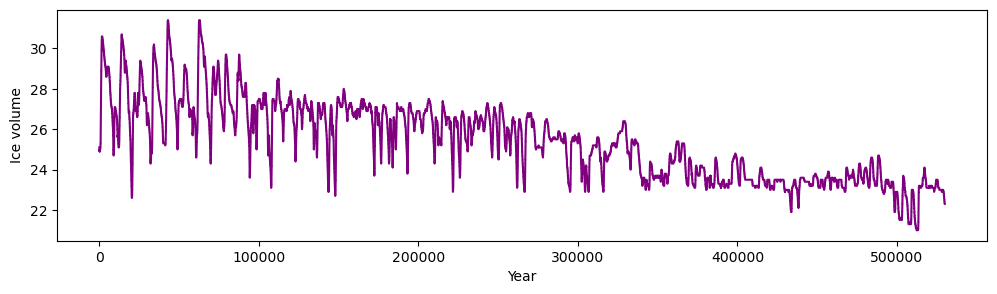

In [30]:
# Plotting ice volume  against year
plt.figure(figsize=(12,3))
plt.plot(filtered_ice['Transformed Year'], filtered_ice['AnIS-V'], color='purple', label='Ice Volume')
plt.xlabel('Year')
plt.ylabel('Ice volume')

Text(0, 0.5, 'Temperature anomaly')

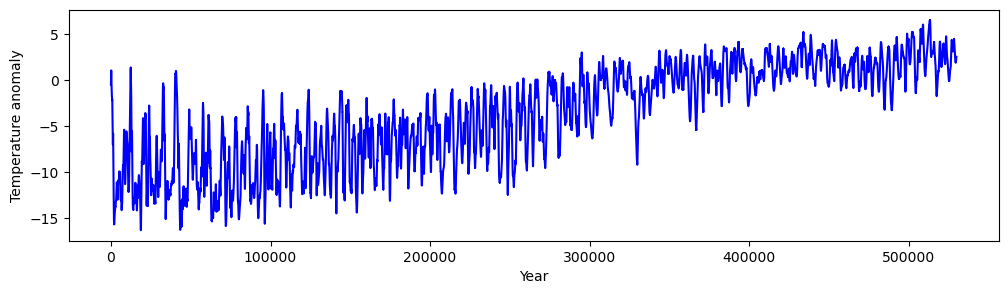

In [31]:
plt.figure(figsize=(12,3))
plt.plot(filtered_ice['Transformed Year'], filtered_ice['tempanomNH'], color='blue', label='Temperature Anomaly')
plt.xlabel('Year')
plt.ylabel('Temperature anomaly')

Now we can attempt to view any possible correlations between the data

In [32]:
# Calculate Pearson correlation coefficients
correlation_coefficients = pd.DataFrame({
    'Rainfall vs CO2': filtered_co2['CO2 (ppmv)'].corr(yearly_median_rainfall_dataset['Median rainfall']),
    'Rainfall vs Temperature': filtered_temp['temp'].corr(yearly_median_rainfall_dataset['Median rainfall'])
}, index=[0])

# Display correlation coefficients
print(correlation_coefficients)

totalraincorr = pd.DataFrame({
    'Rainfall vs CO2': filtered_co2['CO2 (ppmv)'].corr(yearly_rainfall_dataset['Rainfall']),
    'Rainfall vs Temperature': filtered_temp['temp'].corr(yearly_rainfall_dataset['Rainfall'])
}, index=[0])

print(totalraincorr)

   Rainfall vs CO2  Rainfall vs Temperature
0         0.018008                -0.079192
   Rainfall vs CO2  Rainfall vs Temperature
0         0.038071                -0.003952


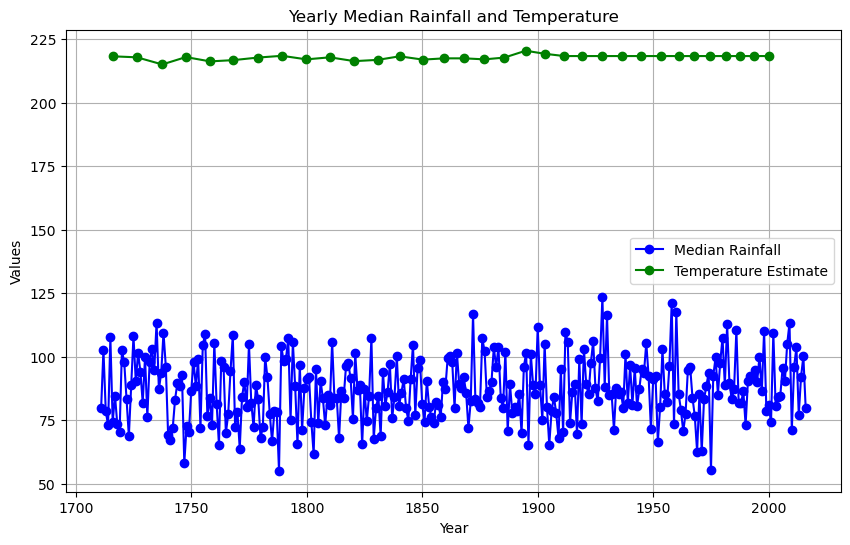

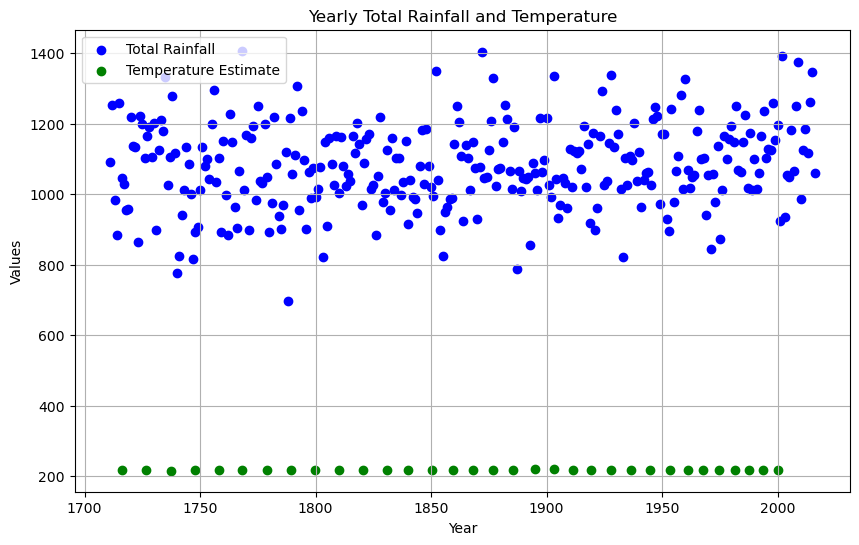

In [33]:
# Line plot: Rainfall and Temperature over years
plt.figure(figsize=(10, 6))
plt.plot(yearly_median_rainfall_dataset['Year'], yearly_median_rainfall_dataset['Median rainfall'], marker='o', linestyle='-', color='blue', label='Median Rainfall')
plt.plot(filtered_temp['Year'], filtered_temp['temp'], marker='o', linestyle='-', color='green', label='Temperature Estimate')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Yearly Median Rainfall and Temperature')
plt.legend()
plt.grid(True)
plt.show()

#scatter plot: Rainfall and Temperature over years
plt.figure(figsize=(10, 6))
plt.scatter(yearly_rainfall_dataset['Year'], yearly_rainfall_dataset['Rainfall'], color='blue', label='Total Rainfall')
plt.scatter(filtered_temp['Year'], filtered_temp['temp'], color='green', label='Temperature Estimate')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Yearly Total Rainfall and Temperature')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
print(yearly_rainfall_dataset)

     Year  Rainfall
0    1711    1091.6
1    1712    1252.6
2    1713     982.5
3    1714     884.2
4    1715    1258.0
..    ...       ...
301  2012    1183.7
302  2013    1116.5
303  2014    1262.7
304  2015    1346.0
305  2016    1060.7

[306 rows x 2 columns]


## Inverting data for rain

In [35]:
cleaned_co2 = filtered_co2[['Year', 'CO2 (ppmv)']]
cleaned_temp = filtered_temp[['Year', 'temp']]
cleaned_co2['Year'] = cleaned_co2['Year'].astype(int)
cleaned_temp['Year'] = cleaned_temp['Year'].astype(int)

# print(cleaned_co2)
# print(cleaned_temp)

yearly_rainfall_dataset = yearly_rainfall_dataset.sort_values(by='Year', ascending=False)
cleaned_rainfall = yearly_rainfall_dataset.reset_index(drop=True)

yearly_median_rainfall_dataset = yearly_median_rainfall_dataset.sort_values(by='Year',ascending=False)
cleaned_medianrainfall = yearly_median_rainfall_dataset.reset_index(drop=True)

# Merge rainfall and co2 based on 'Year' column using an outer join
combined_data = pd.merge(cleaned_rainfall, cleaned_co2, on='Year', how='outer')

# Merge with cleaned_temp based on 'Year' column using an outer join
combined_data = pd.merge(combined_data, cleaned_temp, on='Year', how='outer')
combined_raindata = pd.merge(combined_data, cleaned_medianrainfall, on='Year', how='outer')

# Check the combined data
print(combined_raindata)
combined_raindata.to_csv('./data/generated/combined_raindata.csv', index=False)
combined_raindata.to_json('./data/generated/combined_raindata.json')

     Year  Rainfall  CO2 (ppmv)  temp  Median rainfall
0    2016    1060.7         NaN   NaN            79.80
1    2015    1346.0         NaN   NaN           100.15
2    2014    1262.7         NaN   NaN            92.10
3    2013    1116.5         NaN   NaN            77.15
4    2012    1183.7         NaN   NaN           103.70
..    ...       ...         ...   ...              ...
356  1715    1258.0         NaN   NaN           107.55
357  1714     884.2         NaN   NaN            72.95
358  1713     982.5         NaN   NaN            78.60
359  1712    1252.6         NaN   NaN           102.70
360  1711    1091.6         NaN   NaN            79.70

[361 rows x 5 columns]


C:\Users\neilj\AppData\Local\Temp\ipykernel_27272\4194420359.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_co2['Year'] = cleaned_co2['Year'].astype(int)
C:\Users\neilj\AppData\Local\Temp\ipykernel_27272\4194420359.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_temp['Year'] = cleaned_temp['Year'].astype(int)


Inspired from reading Linear [Regression](https://www.ibm.com/topics/linear-regression) and [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#).

In [36]:
# Drop rows with missing CO2 and temp values
data_for_prediction = combined_raindata.dropna(subset=['CO2 (ppmv)', 'temp'])

# Prepare the data for linear regression
X = data_for_prediction[['Year']]
y_CO2 = data_for_prediction['CO2 (ppmv)']
y_temp = data_for_prediction['temp']

# Fit linear regression models
reg_CO2 = LinearRegression().fit(X, y_CO2)
reg_temp = LinearRegression().fit(X, y_temp)

# Predict missing values for 2016
pred_CO2_2016 = reg_CO2.predict([[2016]])[0]
pred_temp_2016 = reg_temp.predict([[2016]])[0]

# Update the DataFrame with predicted values
combined_raindata.loc[combined_raindata['Year'] == 2016, 'CO2 (ppmv)'] = pred_CO2_2016
combined_raindata.loc[combined_raindata['Year'] == 2016, 'temp'] = pred_temp_2016

# Display the updated DataFrame
# print(combined_raindata)

# Save the updated data to CSV and JSON files
combined_raindata.to_csv('./data/generated/combined_raindata_predicted.csv', index=False)
combined_raindata.to_json('./data/generated/combined_raindata_predicted.json')


c:\Users\neilj\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\neilj\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Interpolating after the linear regression gave us data up to 2016

In [37]:
# Interpolate missing values for 'CO2 (ppmv)' and 'temp' columns
combined_raindata['CO2 (ppmv)'] = combined_raindata['CO2 (ppmv)'].interpolate(method='linear')
combined_raindata['temp'] = combined_raindata['temp'].interpolate(method='linear')

# Display the updated DataFrame
print(combined_raindata)

# Save the updated data to CSV and JSON files
combined_raindata.to_csv('./data/generated/combined_raindata_interpolated.csv', index=False)
combined_raindata.to_json('./data/generated/combined_raindata_interpolated.json')

     Year  Rainfall  CO2 (ppmv)        temp  Median rainfall
0    2016    1060.7  339.050333  218.799164            79.80
1    2015    1346.0  340.981810  218.767966           100.15
2    2014    1262.7  342.913287  218.736768            92.10
3    2013    1116.5  344.844764  218.705571            77.15
4    2012    1183.7  346.776241  218.674373           103.70
..    ...       ...         ...         ...              ...
356  1715    1258.0  278.270110  218.200000           107.55
357  1714     884.2  278.270110  218.200000            72.95
358  1713     982.5  278.270110  218.200000            78.60
359  1712    1252.6  278.270110  218.200000           102.70
360  1711    1091.6  278.270110  218.200000            79.70

[361 rows x 5 columns]


                     Year  Rainfall  CO2 (ppmv)      temp  Median rainfall
Year             1.000000  0.122061    0.889756  0.616070         0.104077
Rainfall         0.122061  1.000000    0.161932 -0.018461         0.821850
CO2 (ppmv)       0.889756  0.161932    1.000000  0.512460         0.116122
temp             0.616070 -0.018461    0.512460  1.000000        -0.010088
Median rainfall  0.104077  0.821850    0.116122 -0.010088         1.000000


<Axes: >

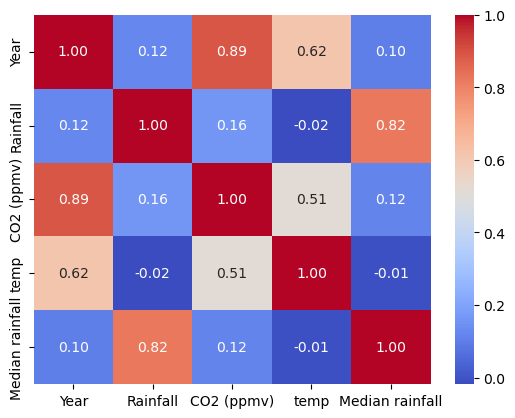

In [38]:
# Calculate the correlation matrix
rain_matrix = combined_raindata.corr()

# Display the correlation matrix
print(rain_matrix)
sns.heatmap(rain_matrix, cmap='coolwarm', annot=True, fmt='.2f')

Inspired by reading matplotlib [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twinx.html) regarding shared xaxis, as it is easier to show the relationship over time when these values can be viewed with individual y-axis.

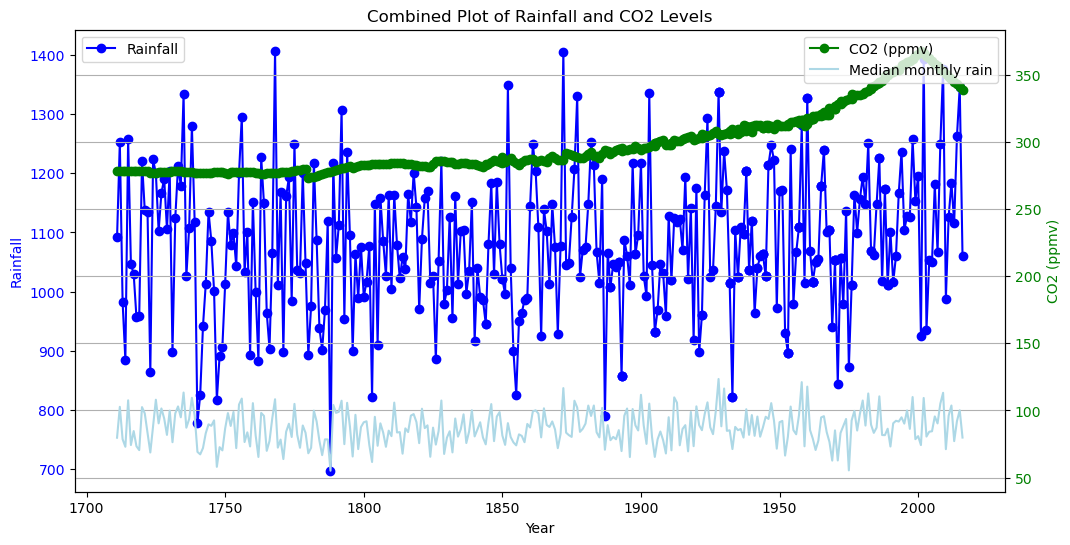

In [60]:
# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Rainfall
ax1.set_xlabel('Year')
ax1.set_ylabel('Rainfall', color='blue')
ax1.plot(combined_raindata['Year'], combined_raindata['Rainfall'], label='Rainfall', color='blue', marker='o')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Creating a second y-axis for CO2
ax2 = ax1.twinx()
ax2.set_ylabel('CO2 (ppmv)', color='green')
ax2.plot(combined_raindata['Year'], combined_raindata['CO2 (ppmv)'], label='CO2 (ppmv)', color='green', marker='o')
ax2.plot(combined_raindata['Year'], combined_raindata['Median rainfall'], label='Median monthly rain', color='lightblue')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')

plt.title('Combined Plot of Rainfall and CO2 Levels')
plt.grid(True)
plt.show()


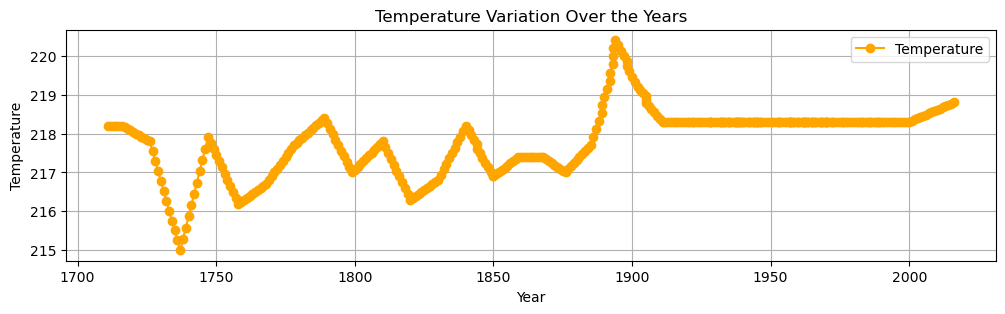

In [61]:
plt.figure(figsize=(12, 3))

plt.plot(combined_raindata['Year'], combined_raindata['temp'], label='Temperature', color='orange', marker='o')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Variation Over the Years')
plt.legend()
plt.grid(True)
plt.show()

## Ice, ice baby

This ice data is all over the place, from looking at it. Not combined with years in mind, just smushed together. Needs similar treatment to the rainfall data.

In [62]:
print(filtered_ice)

       age_calkaBP  AnIS-V  tempanomNH  Transformed Year
53000          0.0    25.1      -0.465             -64.0
52999         -0.1    25.1      -0.400             -54.0
52998         -0.2    25.1      -0.345             -44.0
52997         -0.3    25.1      -0.297             -34.0
52996         -0.4    25.1      -0.258             -24.0
...            ...     ...         ...               ...
3          -5299.7    22.3       2.450          529906.0
2          -5299.8    22.3       2.478          529916.0
1          -5299.9    22.3       2.507          529926.0
0          -5300.0    22.3       2.537          529936.0
43010          NaN    27.4      -5.740               NaN

[53001 rows x 4 columns]


In [63]:
filtered_ice = filtered_ice.sort_values(by='Transformed Year', ascending=True)
cleaned_ice = filtered_ice.reset_index(drop=True)
print(cleaned_ice)

       age_calkaBP  AnIS-V  tempanomNH  Transformed Year
0              0.0    25.1      -0.465             -64.0
1             -0.1    25.1      -0.400             -54.0
2             -0.2    25.1      -0.345             -44.0
3             -0.3    25.1      -0.297             -34.0
4             -0.4    25.1      -0.258             -24.0
...            ...     ...         ...               ...
52996      -5299.7    22.3       2.450          529906.0
52997      -5299.8    22.3       2.478          529916.0
52998      -5299.9    22.3       2.507          529926.0
52999      -5300.0    22.3       2.537          529936.0
53000          NaN    27.4      -5.740               NaN

[53001 rows x 4 columns]


In [64]:
print(co2_for_ice)

      Gasage (yr BP)   CO2 (ppmv)
0          -51.030000  368.022488
1          -48.000000  361.780737
2          -46.279272  359.647793
3          -44.405642  357.106740
4          -43.080000  353.946685
...               ...         ...
1451    526107.000000  233.700000
1452    526895.806061  230.300000
1453    527698.690909  227.800000
1454    528516.690909  224.700000
1455    529403.430303  222.700000

[1456 rows x 2 columns]


In [65]:
print(temp_for_ice)

          EDC3béta   temp
0        -50.00000  218.3
1        -43.55977  218.3
2        -37.44019  218.3
3        -31.64156  218.3
4        -24.55278  218.3
...            ...    ...
5308  527152.10000  210.6
5309  527728.80000  210.4
5310  528319.40000  210.3
5311  528915.60000  210.5
5312  529498.10000  211.4

[5313 rows x 2 columns]


In [66]:
# combine the co2 for ice, temp for ice and filtered ice
combined_icedata = pd.DataFrame({
    'Years in the past from 1950': filtered_ice['Transformed Year'],
    'Ice Volume': filtered_ice['AnIS-V'],
    'Temperature Anomaly' : filtered_ice['tempanomNH'],
    'CO2 for Ice': co2_for_ice['CO2 (ppmv)'],
    'Temperature for Ice': temp_for_ice['temp']
})
combined_icedata.to_csv('./data/generated/combined_icedata.csv', index=False)
combined_icedata.to_json('./data/generated/combined_icedata.json')

## Aligning the datasets

---
# **Conclusions**
---

---
# **References**
---

---
# End